In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [42]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [43]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({1: 22, 4: 21, 6: 16, 2: 16, 3: 14, 5: 11})
Вероятности выпадений каждой из сторон:
{4: 0.21, 6: 0.16, 2: 0.16, 5: 0.11, 1: 0.22, 3: 0.14}


Это и есть оценка функции вероятности дискретного распределения.

(array([0.06110339, 0.06110339, 0.18331018, 0.28514917, 0.22404577,
        0.50919494, 0.32588476, 0.20367798, 0.06110339, 0.12220679]),
 array([-2.45792043, -1.96694933, -1.47597823, -0.98500713, -0.49403603,
        -0.00306493,  0.48790617,  0.97887726,  1.46984836,  1.96081946,
         2.45179056]),
 <a list of 10 Patch objects>)

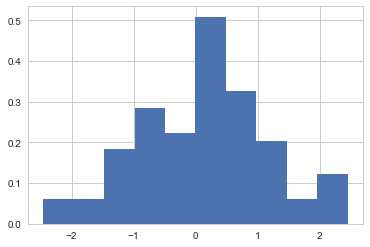

In [50]:
plt.hist(sample, density=True)

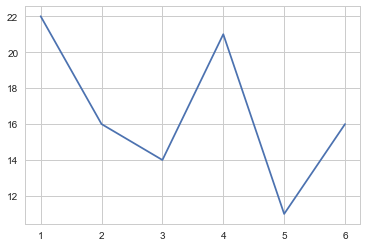

In [45]:
a = np.array([[x, y] for x, y in sorted(c.items())]).T
xs = a[0]
ys = a[1]
plt.plot(xs, ys)

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [46]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

Эмпирическая функция распределения для полученной выборки:

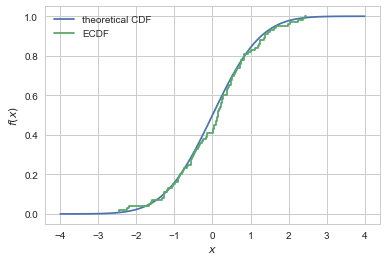

In [47]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5,0,'$x$')

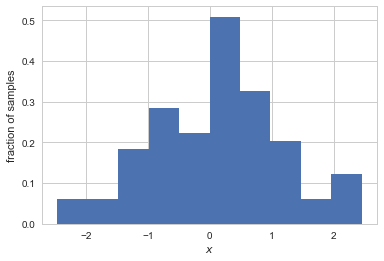

In [49]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5,0,'$x$')

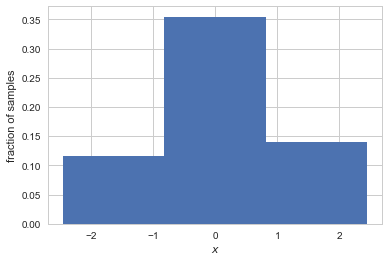

In [52]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

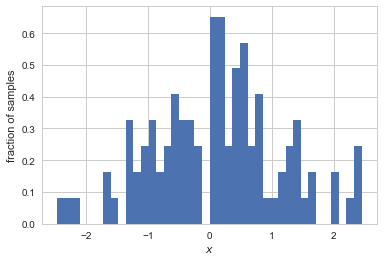

In [53]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5,0,'$x$')

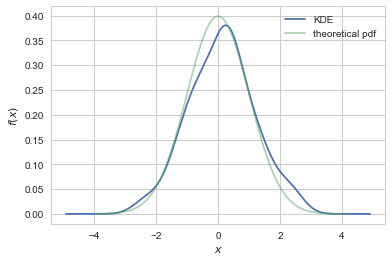

In [75]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot.kde()

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

2220.2553035381166 29.780648463402596


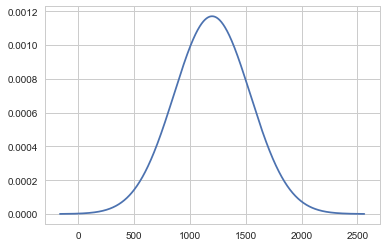

In [64]:
from math import sqrt

mu = 1197.69
var = 116182.2
stdev = sqrt(var)

xs = np.linspace(mu - 4*stdev, mu + 4*stdev, 1000)
ys = sts.norm(mu, stdev).pdf(xs)
plt.plot(xs, ys)
print(mu + 3*stdev, sqrt(var/(2015-1885+1)))

1287.0319453902077


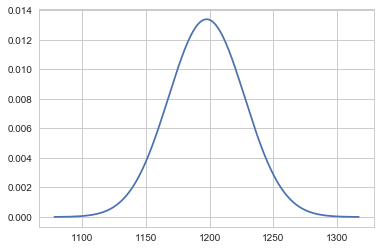

In [65]:
mu_n = mu
var_n = var/(2015-1885+1)
stdev_n = sqrt(var_n)

xs = np.linspace(mu_n - 4*stdev_n, mu_n + 4*stdev_n, 1000)
ys = sts.norm(mu_n, stdev_n).pdf(xs)
plt.plot(xs, ys)
print(mu_n + 3*stdev_n)